In [1]:
pip install numpy pandas matplotlib scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/11.1 MB 4.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 6.3 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 7.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Coeficientes: [  0.49300675 289.32526239]
Error cuadrático medio: 1655034368.49
Puntaje de varianza (R^2 score): 0.12


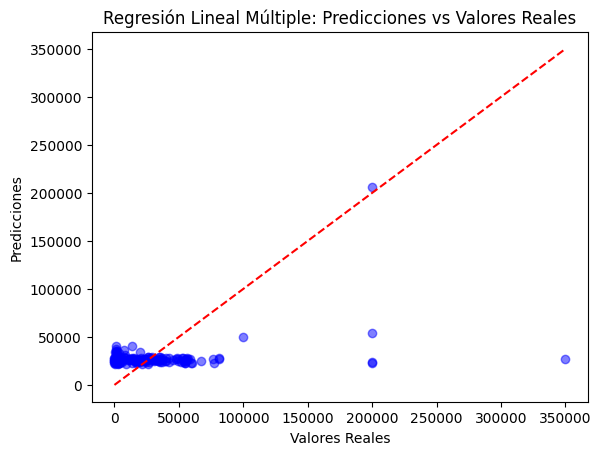

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos (debes reemplazar 'ruta/del/archivo.csv' con tu dataset)
filtered_data = pd.read_csv("articulos_ml.csv")

# Crear una nueva variable combinando enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + 
        filtered_data['# of comments'].fillna(0) + 
        filtered_data['# Images video'])

# Crear la matriz de características
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma

# Convertir los datos a arrays de NumPy
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

# Crear el modelo de regresión lineal
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)

# Hacer predicciones con el modelo entrenado
z_pred = regr2.predict(XY_train)

# Evaluación del modelo
print('Coeficientes:', regr2.coef_)
print("Error cuadrático medio: %.2f" % mean_squared_error(z_train, z_pred))
print('Puntaje de varianza (R^2 score): %.2f' % r2_score(z_train, z_pred))

# Graficar resultados
plt.scatter(z_train, z_pred, color="blue", alpha=0.5)
plt.plot([min(z_train), max(z_train)], [min(z_train), max(z_train)], color="red", linestyle="--")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal Múltiple: Predicciones vs Valores Reales")
plt.show()
